In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import keras
from keras.utils import plot_model
from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD


Using TensorFlow backend.


In [2]:
df = pd.read_csv('../../data.csv', sep=',', index_col='id')
subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',
            'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
df['mean'] = df[subjects].mean(axis=1)
df['round'] = np.rint(df['mean'].values)
df['k'] = [0.8] * 20 + [0.5] * 20 + [0.3] * 20 + [0.3] * 20 + [0.3] * 20


In [19]:
subject_courses = {
    1: ['calculus', 'algebra', 'discrete'],
    2: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics'],
    3: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics', 
        'prob_and_stat', 'pde', 'functional'],
    4: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics', 
        'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
}

years = [13, 14, 15, 16, 17]
train_data = []


for index, row in df.iterrows():
    for i in range(1, 4):
        # [1] -> 2, [1,2] -> 3, [1, 2, 3] -> 4
        
        current_subjects = row[subject_courses[i]]
        if current_subjects.isnull().values.any():
            continue
        
        previous_mean = current_subjects.mean()
        next_subjects = row[subject_courses[i+1]]
        
        if next_subjects.isnull().values.any():
            continue
            
        next_mean = next_subjects.mean()

        train_data.append(dict(
            ege=row['ege'],
            k=row['k'],
            course=i,
            prev_mean=previous_mean,
            next_mean=next_mean,
            year=row['year']
        ))

train_df = pd.DataFrame(train_data)
# train_df['round'] = np.rint(train_df['mean'].values)
# train_df[['prev_mean', 'next_mean']]
x = train_df[['ege', 'k', 'course', 'prev_mean']].values
y = train_df['next_mean'].values
train_df

,course,ege,k,next_mean,prev_mean,year
0,1,245.0,0.8,5.000000,5.000000,13.0
1,2,245.0,0.8,5.000000,5.000000,13.0
2,3,245.0,0.8,5.000000,5.000000,13.0
3,1,240.0,0.8,5.000000,5.000000,13.0
4,2,240.0,0.8,5.000000,5.000000,13.0
5,3,240.0,0.8,5.000000,5.000000,13.0
6,1,231.0,0.8,4.166667,4.666667,13.0
7,2,231.0,0.8,4.222222,4.166667,13.0
8,3,231.0,0.8,4.250000,4.222222,13.0
9,1,241.0,0.8,4.500000,4.666667,13.0


In [4]:
max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=1))
model.add(LSTM(128))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
history = model.fit(x, y, epochs=300, batch_size=50, verbose=0, shuffle=True)


Instructions for updating:
Use tf.cast instead.


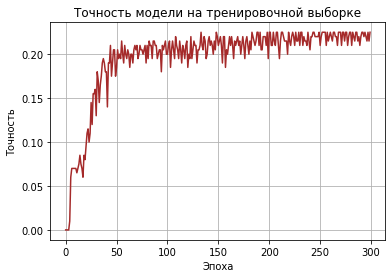

In [39]:
plt.plot(history.history['acc'], color='brown')
plt.grid()
plt.title('Точность модели на тренировочной выборке')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.savefig('model_acc_stud.png', dpi=300)

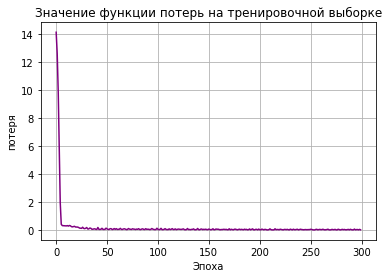

In [40]:
plt.plot(history.history['loss'], color='purple')
plt.grid()
plt.title('Значение функции потерь на тренировочной выборке')
plt.ylabel('потеря')
plt.xlabel('Эпоха')
plt.savefig('model_loss_stud.png', dpi=300)


#### Прогнозирование для 16 года на 2 курс


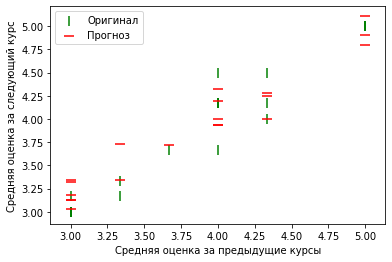

In [8]:
df_16 = train_df[train_df['year'] == 16][['ege', 'k', 'prev_mean', 'course', 'next_mean']]
x_train = df_16[['ege', 'k', 'course', 'prev_mean']].values
y_train = df_16['next_mean'].values

y_predict = model.predict(x_train)
# y_predict = list(map(lambda y : y.argmax()+3, y_predict))

marker_size = [100 for i in range(len(x))]
plt.scatter(x_train[:, 3], y_train, marker='|', color='green', s=marker_size)
plt.scatter(x_train[:, 3], y_predict, marker='_', color='red', s=marker_size)

plt.legend(['Оригинал', 'Прогноз'])
plt.xticks(np.arange(3, 5.25, 0.25))
plt.yticks(np.arange(3, 5.25, 0.25))
plt.xlabel('Средняя оценка за предыдущие курсы')
plt.ylabel('Средняя оценка за следующий курс')
plt.savefig('16_1_to_2.png', dpi=300)


#### Прогнозирование для 15 года на 4 курс


/home/roman/PycharmProjects/Example/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


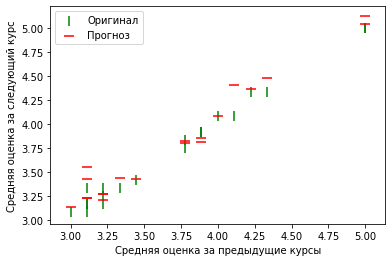

In [9]:
df_15 = train_df[train_df['year'] == 15][train_df['course']==3][['ege', 'k', 'prev_mean', 'course', 'next_mean']]
x_train = df_15[['ege', 'k', 'course', 'prev_mean']].values
y_train = df_15['next_mean'].values

y_predict = model.predict(x_train)

marker_size = [100 for i in range(len(x))]
plt.scatter(x_train[:, 3], y_train, marker='|', color='green', s=marker_size)
plt.scatter(x_train[:, 3], y_predict, marker='_', color='red', s=marker_size)

plt.legend(['Оригинал', 'Прогноз'])
plt.xticks(np.arange(3, 5.25, 0.25))
plt.yticks(np.arange(3, 5.25, 0.25))
plt.xlabel('Средняя оценка за предыдущие курсы')
plt.ylabel('Средняя оценка за следующий курс');


(array([7., 0., 2., 0., 4., 4., 0., 0., 0., 3.]),
 array([3.113519 , 3.3092484, 3.5049777, 3.700707 , 3.8964365, 4.092166 ,
        4.287895 , 4.4836245, 4.6793537, 4.8750834, 5.0708127],
       dtype=float32),
 <a list of 10 Patch objects>)

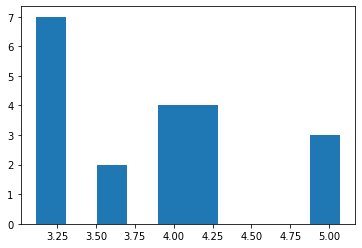

In [16]:
plt.hist(y_predict)


#### Прогнозирование для 2016 и 2017 до 4 курса



In [31]:
x_test_16 = df_16.copy()
for i in range(1, 4):
    x_test_16['course'] = i
    y_predict = model.predict(x_test_16[['ege', 'k', 'course', 'prev_mean']].values)
    x_test_16['prev_mean'] = y_predict

x_test_17 = df[df['year'] == 17].copy()
x_test_17['prev_mean'] = x_test_17[subject_courses[1]].mean(axis=1)
x_test_17['course'] = 1
x_test_17 = x_test_17[['ege', 'k', 'course', 'prev_mean']]


for i in range(1, 4):
    x_test_17['course'] = i
    y_predict = model.predict(x_test_17[['ege', 'k', 'course', 'prev_mean']].values)
    x_test_17['prev_mean'] = y_predict



     ege    k  course  prev_mean
id                              
81   241  0.3       1   4.586415
82   231  0.3       1   4.527091
83   215  0.3       1   4.582515
84   218  0.3       1   4.190536
85   207  0.3       1   3.995889
86   209  0.3       1   4.322507
87   204  0.3       1   4.207796
88   198  0.3       1   3.595617
89   195  0.3       1   3.470312
90   213  0.3       1   4.393705
91   202  0.3       1   4.274794
92   204  0.3       1   4.207796
93   191  0.3       1   3.343692
94   199  0.3       1   3.184342
95   195  0.3       1   3.470312
96   191  0.3       1   3.343692
97   191  0.3       1   3.343692
98   189  0.3       1   3.528106
99   186  0.3       1   3.712268
100  184  0.3       1   4.119740

     ege    k  course  prev_mean
id                              
81   241  0.3       2   4.147802
82   231  0.3       2   4.090917
83   215  0.3       2   4.144061
84   218  0.3       2   3.768867
85   207  0.3       2   3.556044
86   209  0.3       2   4.352124
87   204 

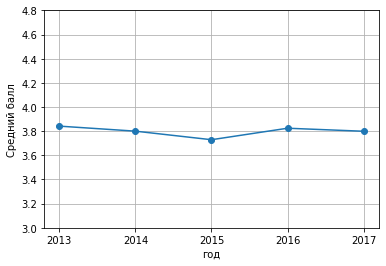

In [38]:
mean_rating_by_flow = {}

for year in years:
    mean_rating_by_flow[int("20{}".format(year))] = (df[df['year'] == year][['mean']].sum() / 20).values[0]

mean_rating_by_flow[int("20{}".format(16))] = x_test_16['prev_mean'].mean()
mean_rating_by_flow[int("20{}".format(17))] = x_test_17['prev_mean'].mean()

x = mean_rating_by_flow.keys()
y = mean_rating_by_flow.values()
plt.errorbar(x, y, marker='o')

plt.ylabel('Средний балл')
plt.xlabel('год')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(3, 5, 0.2))
plt.grid()
plt.savefig('mean_by_flow_with_prediction.png', dpi=300)

In [41]:
model.save('student_min_loss.h5')
